In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import colormap

## Compare accuracies across models

In [6]:
Accuracies = {
    "KNN": 0.6258,
    "RF": 0.6979,
    "LR": 0.5932,
    "SVM": 0.7084,
    "MLP": 0.5111,
    "GBC": 0.5942 
}

Accuracies_std = {
    "KNN": 0.0793,
    "RF": 0.0390,
    "LR": 0.0643,
    "SVM": 0.0239,
    "MLP": 0.0932,
    "GBC": 0.1101
}

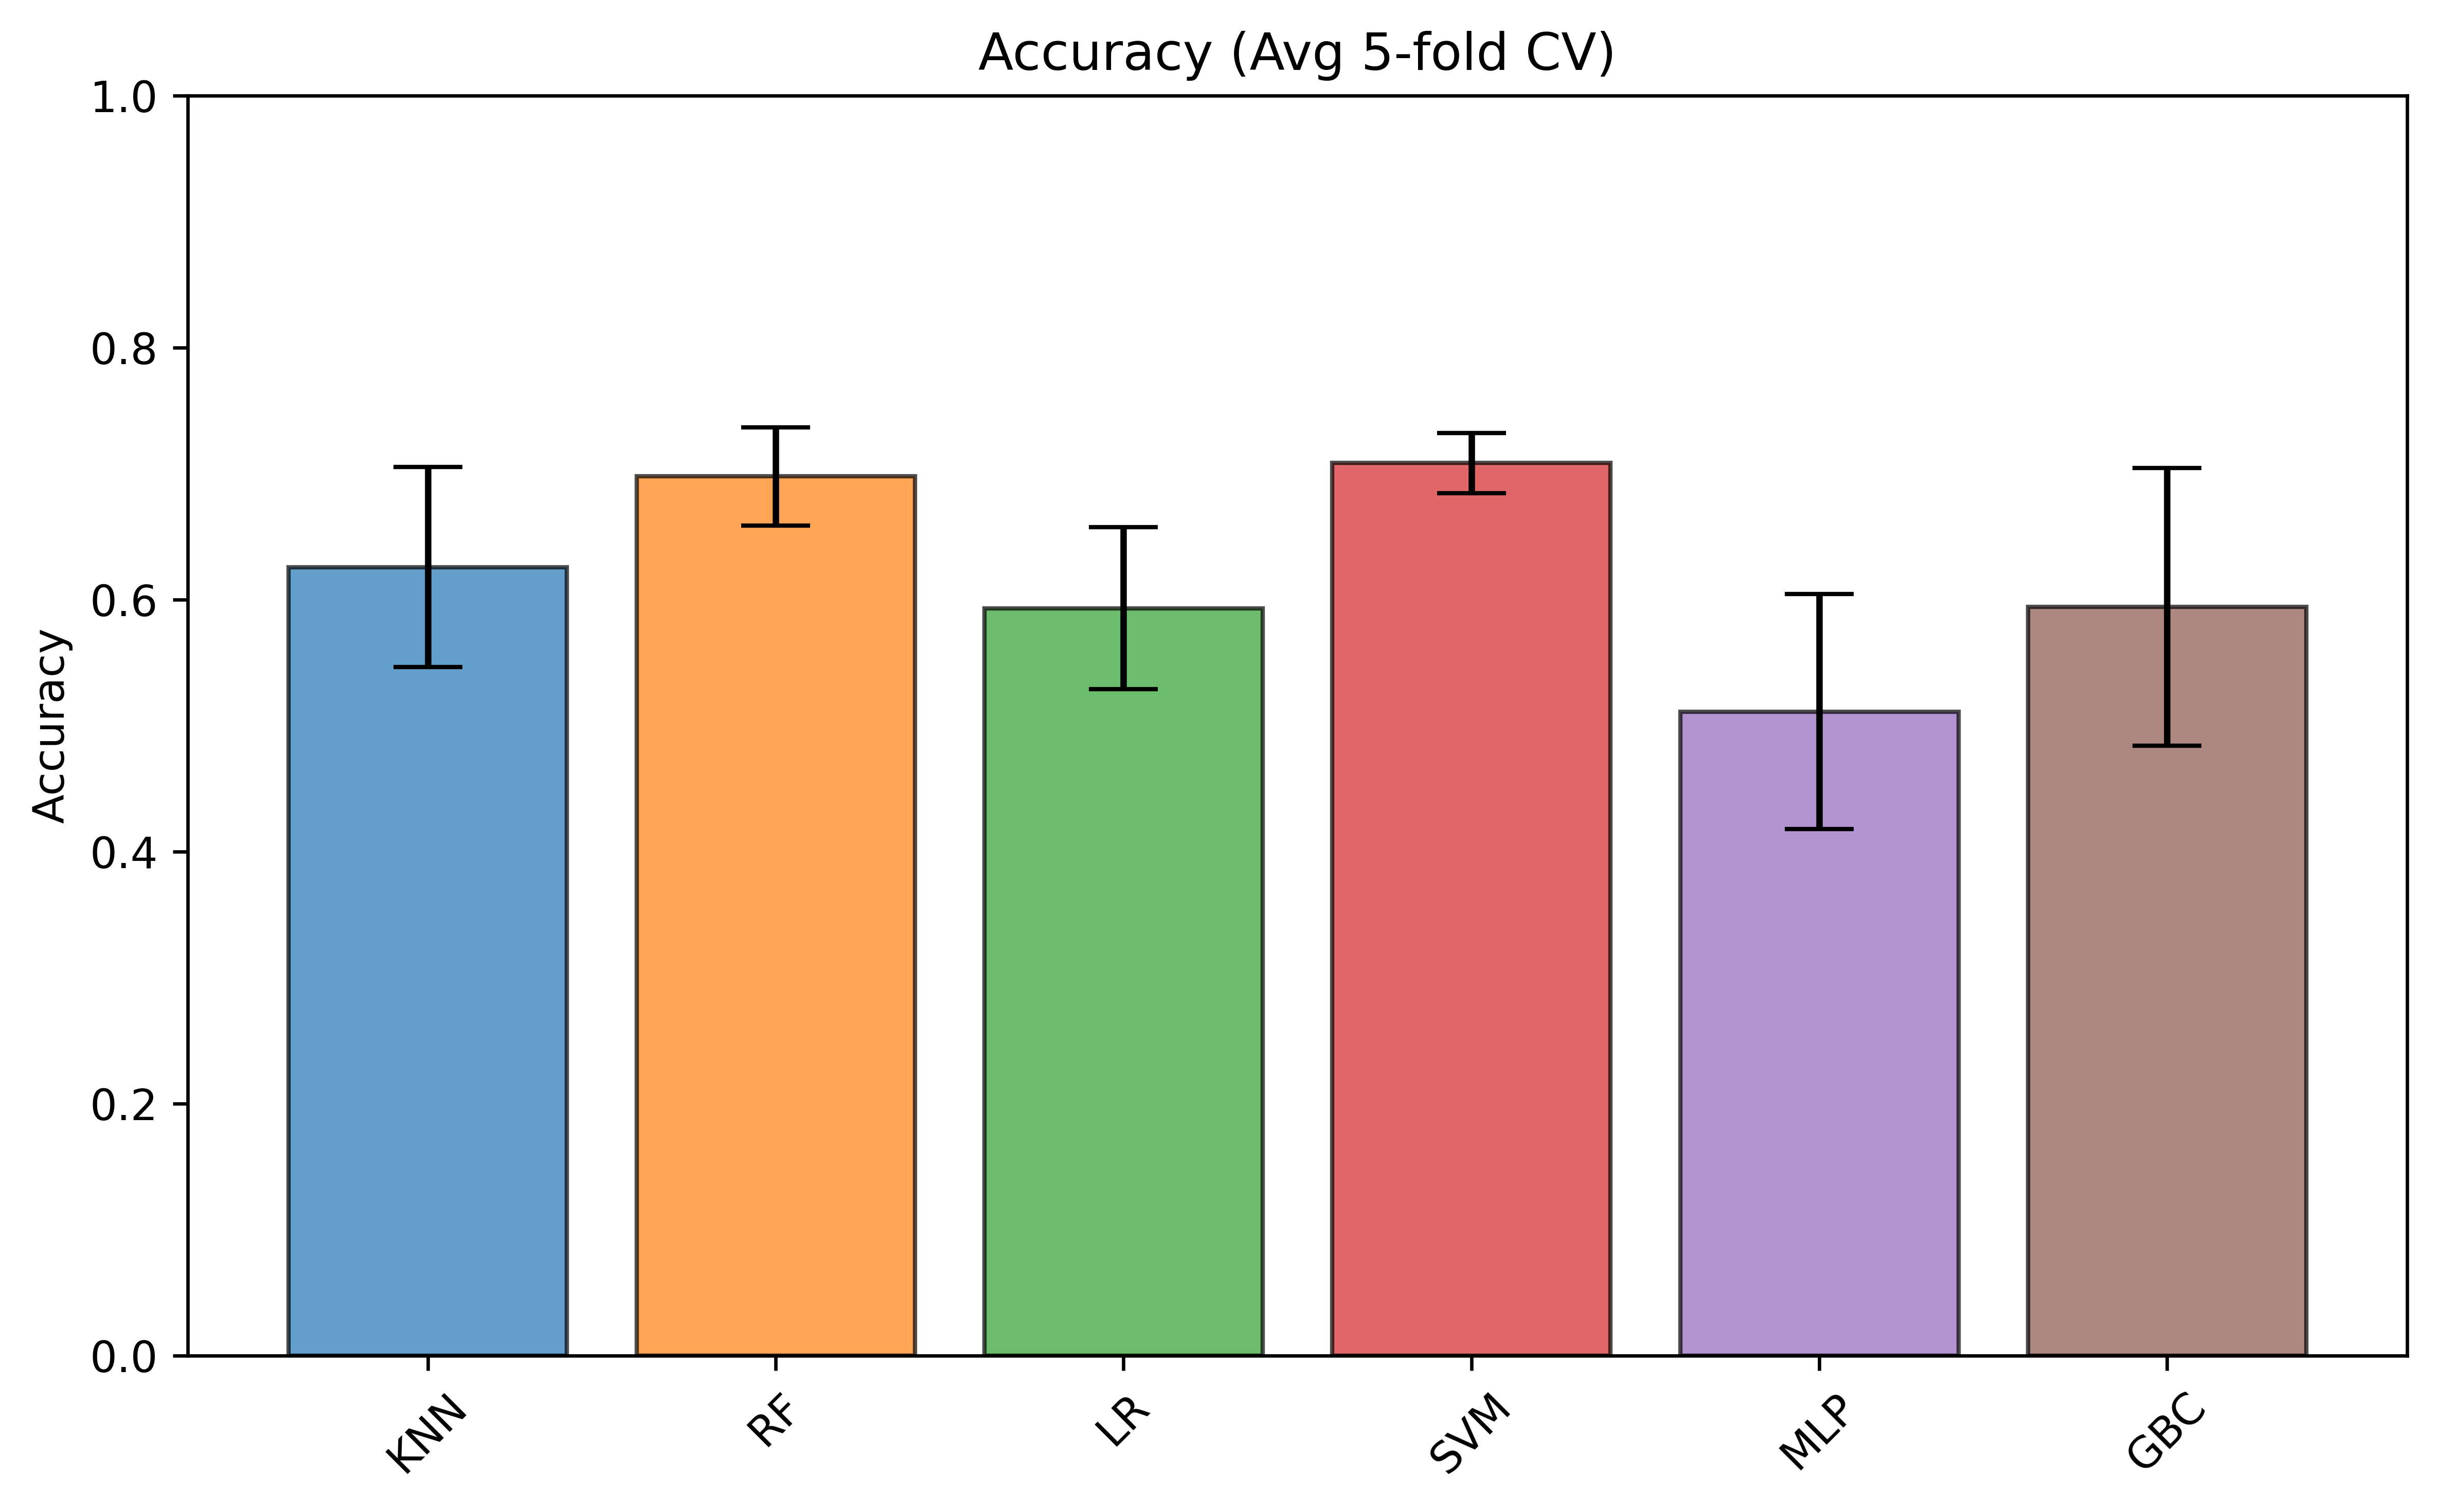

In [7]:
# Extract keys and values in order
models = list(Accuracies.keys())
means = [Accuracies[m] for m in models]
stds = [Accuracies_std[m] for m in models]

# Plot
plt.figure(figsize=(8, 5), dpi=600)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.bar(models, means, yerr=stds, capsize=8, color = colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Accuracy (Avg 5-fold CV)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## AUROC comparison

In [10]:
AUROC_data = {
    "KNN": {
        "probs": [0.8, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.4, 1.0, 1.0, 0.4, 0.4, 0.6, 0.6],
        "first_fold_y_true": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        "first_fold_y_probs": [0.8, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 0.8, 0.8, 1.0, 0.4, 1.0, 1.0, 0.4, 0.4, 0.6, 0.6]},

    "RF": {"probs": [0.73, 0.64, 0.69, 0.58, 0.57, 0.73, 0.69, 0.72, 0.73, 0.68, 0.73, 0.59, 0.66, 0.67, 0.66, 0.73, 0.59, 0.69, 0.71, 0.65],
    "first_fold_y_true": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "first_fold_y_probs": [0.73, 0.64, 0.69, 0.58, 0.57, 0.73, 0.69, 0.72, 0.73, 0.68, 0.73, 0.59, 0.66, 0.67, 0.66, 0.73, 0.59, 0.69, 0.71, 0.65]},

    "LR": {"probs": [0.994623935939137, 0.9924191892461871, 0.9979996609035285, 0.6443918955394018, 0.014905902574859577, 0.7870422267076299, 0.978289323705388, 0.99758246816898, 0.9999781115182935, 0.9752616195157933, 0.9753359548720181, 0.9990963927813822, 0.998772262160801, 0.9994449332245448, 0.9754053515292324, 0.4108872063264554, 5.819934668924818e-05, 0.9999998044058244, 0.9996803794898874, 0.8258245274997623],
    "first_fold_y_true": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "first_fold_y_probs": [0.994623935939137, 0.9924191892461871, 0.9979996609035285, 0.6443918955394018, 0.014905902574859577, 0.7870422267076299, 0.978289323705388, 0.99758246816898, 0.9999781115182935, 0.9752616195157933, 0.9753359548720181, 0.9990963927813822, 0.998772262160801, 0.9994449332245448, 0.9754053515292324, 0.4108872063264554, 5.819934668924818e-05, 0.9999998044058244, 0.9996803794898874, 0.8258245274997623]},

    "SVM": {"probs": [0.687579110062876, 0.7047363182258056, 0.7043582758852988, 0.751450604707522, 0.7529370433444939, 0.7206261184141397, 0.6909920089694802, 0.6618715086001437, 0.660849711284408, 0.6990179401248551, 0.6834379418965912, 0.7350054050503975, 0.6600677161817164, 0.7512228723699974, 0.6825610423007474, 0.7116433789300175, 0.7789488778153371, 0.7539683230592745, 0.6911052646251601, 0.7386881729040782],
    "first_fold_y_true": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "first_fold_y_probs": [0.687579110062876, 0.7047363182258056, 0.7043582758852988, 0.751450604707522, 0.7529370433444939, 0.7206261184141397, 0.6909920089694802, 0.6618715086001437, 0.660849711284408, 0.6990179401248551, 0.6834379418965912, 0.7350054050503975, 0.6600677161817164, 0.7512228723699974, 0.6825610423007474, 0.7116433789300175, 0.7789488778153371, 0.7539683230592745, 0.6911052646251601, 0.7386881729040782]},

    "MLP": {"probs": [0.06310579252403796, 0.17841827934564394, 0.9372278675982042, 0.0013873070764739068, 0.9814784938966733, 0.9993947561141205, 1.0, 0.15775473148009408, 0.009660295248836642, 0.0387910581228901, 0.987444627312735, 2.037671766903577e-06, 0.9999198937169639, 1.316601341937486e-13, 0.9999056032013258, 0.00039474338290675516, 0.9802450850769462, 0.9992829468254124, 1.2854427177286093e-06, 4.418927142112968e-09],
    "first_fold_y_true": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "first_fold_y_probs": [0.06310579252403796, 0.17841827934564394, 0.9372278675982042, 0.0013873070764739068, 0.9814784938966733, 0.9993947561141205, 1.0, 0.15775473148009408, 0.009660295248836642, 0.0387910581228901, 0.987444627312735, 2.037671766903577e-06, 0.9999198937169639, 1.316601341937486e-13, 0.9999056032013258, 0.00039474338290675516, 0.9802450850769462, 0.9992829468254124, 1.2854427177286093e-06, 4.418927142112968e-09]},

    "GBC": {"probs": [0.9999652431975538, 0.9999476974922072, 0.9996517287468718, 0.9975822088536259, 0.8769711773854828, 0.9999538082596507, 0.9999105213918249, 0.9999353675686447, 0.9999600801192188, 0.13867634696846254, 0.9999523050619141, 0.004734459222986856, 0.9998908740927989, 0.9999517127241634, 0.9999735298924876, 0.9999013776615491, 0.9999196374667874, 0.9999363605721151, 0.9999148318657637, 0.0006552081305171395],
    "first_fold_y_true": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    "first_fold_y_probs": [0.9999652431975538, 0.9999476974922072, 0.9996517287468718, 0.9975822088536259, 0.8769711773854828, 0.9999538082596507, 0.9999105213918249, 0.9999353675686447, 0.9999600801192188, 0.13867634696846254, 0.9999523050619141, 0.004734459222986856, 0.9998908740927989, 0.9999517127241634, 0.9999735298924876, 0.9999013776615491, 0.9999196374667874, 0.9999363605721151, 0.9999148318657637, 0.0006552081305171395]} 
}

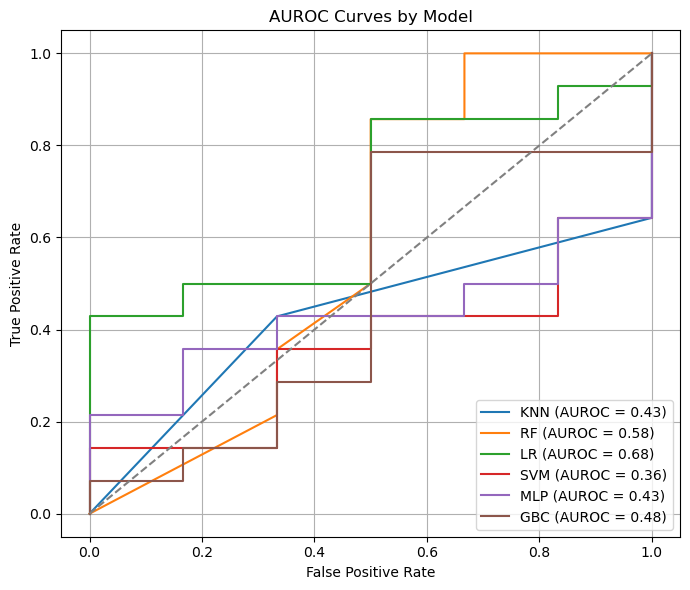

In [11]:
plt.figure(figsize=(7, 6))

# Plot ROC curves
for model_name, data in AUROC_data.items():
    y_true = data["first_fold_y_true"]
    y_probs = data["first_fold_y_probs"]
    
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUROC = {auc:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curves by Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()